<a href="https://www.kaggle.com/code/raneemabdo/tree-based-models?scriptVersionId=145666461" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/DrSaadLa/PythonTuts/main/TreeBasedModels/inf_gain.csv")

In [3]:
df.head()

,State,Median_income,%_Bachelors_degree_or_higher,%_White,Political_Leaning,income,education,diversity
0,California,70489,0.33,0.37,0,1,1,1
1,Colorado,73034,0.39,0.68,0,1,1,1
2,Connecticut,72812,0.38,0.66,0,1,1,1
3,Delaware,65012,0.31,0.62,0,1,1,1
4,D.C.,85750,0.57,0.37,0,1,1,1


In [4]:
df.drop(['State','Median_income','%_Bachelors_degree_or_higher','%_White'],axis=1)

,Political_Leaning,income,education,diversity
0,0,1,1,1
1,0,1,1,1
2,0,1,1,1
3,0,1,1,1
4,0,1,1,1
5,0,1,1,1
6,0,1,1,1
7,0,0,0,0
8,0,1,1,1
9,0,1,1,0


In [5]:
df['Political_Leaning'].unique()

array([0, 2, 1])

In [6]:
df['Political_Leaning']=df['Political_Leaning'].map({0:0,1:1,2:1})

In [7]:
df['Political_Leaning'].value_counts()

Political_Leaning
1    29
0    22
Name: count, dtype: int64

**manual calulate entropy**

In [8]:
n_samples=len(df)
n_samples

51

In [9]:
num_yes=df['Political_Leaning'] [df['Political_Leaning']==1].sum()
num_yes

29

In [10]:
num_no=n_samples-num_yes
num_no

22

In [11]:
prop_yes=num_yes/n_samples
prop_no=num_no/n_samples
print(prop_yes)
print(prop_no)

0.5686274509803921
0.43137254901960786


In [12]:
log_prop_yes=np.log2(prop_yes)
log_prop_no=np.log2(prop_no)
print(log_prop_yes)
print(log_prop_no)

-0.8144443468439235
-1.2129937233341983


In [13]:
prop_log_yes=log_prop_yes*prop_yes
prop_log_no=log_prop_no*prop_no
print(prop_log_yes)
print(prop_log_no)

-0.46311541291125063
-0.5232521943794581


In [14]:
sum_every=prop_log_yes+prop_log_no
print(sum_every)

-0.9863676072907088


In [15]:
final_res=-1*sum_every
print(final_res)

0.9863676072907088


In [16]:
entropy=final_res

**decision tree classifier**

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree,export_graphviz
import matplotlib.pyplot as plt

In [18]:
x=df[['income','education','diversity']]
y=df['Political_Leaning']
dt=DecisionTreeClassifier(max_depth=2,criterion='entropy',random_state=10)
dt.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=10)

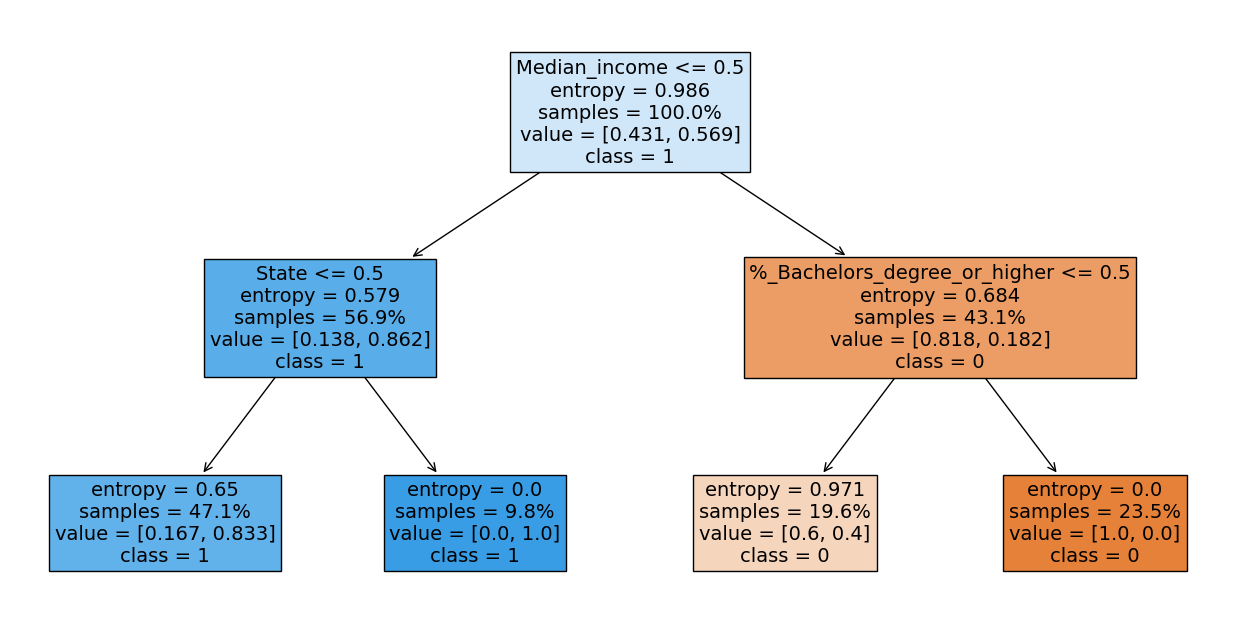

In [19]:
plt.figure(figsize=(16,8))
_=plot_tree(dt,filled=True,feature_names=df.columns,fontsize=14,proportion=True,class_names=['0','1'])